In [ ]:
from keras.datasets import imdb

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - binary_accuracy: 0.6725 - loss: 0.6107 - val_binary_accuracy: 0.8590 - val_loss: 0.3977
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.8925 - loss: 0.3315 - val_binary_accuracy: 0.8868 - val_loss: 0.3054
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.9248 - loss: 0.2321 - val_binary_accuracy: 0.8868 - val_loss: 0.2851
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.9420 - loss: 0.1820 - val_binary_accuracy: 0.8875 - val_loss: 0.2795
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - binary_accuracy: 0.9510 - loss: 0.1507 - val_binary_accuracy: 0.8855 - val_loss: 0.2838
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.9604 - loss: 0.1273 - val_binary_accuracy: 0.8848 - val_loss: 0.2900
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.9713 - loss: 0.1028 - val_binary_accuracy: 0.8783 - val_loss: 0.3402
Epoch 8/20
3

In [ ]:
history_dict = history.history
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

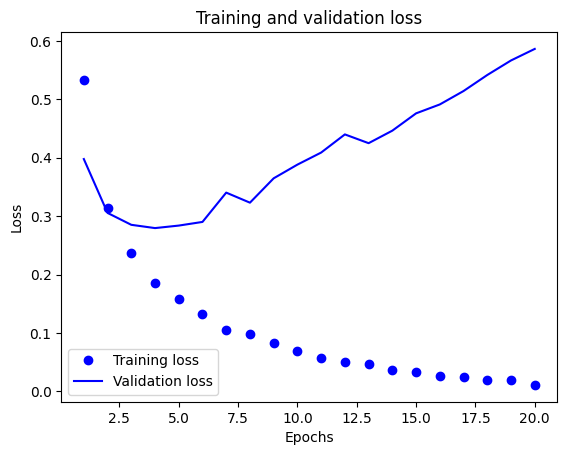

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)
#epochs=range(1,21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

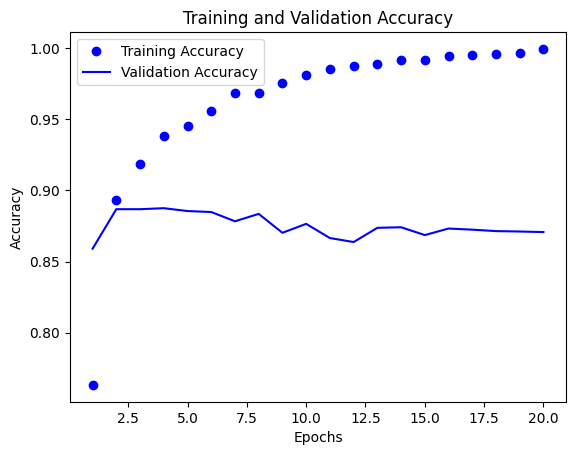

In [ ]:
plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8547 - loss: 0.6043
Test Loss:  0.5895132422447205
Test Accuracy:  0.8580800294876099


In [ ]:
model_one = models.Sequential()
model_one.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_one.add(layers.Dense(1, activation='sigmoid'))

model_one.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_one.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7111 - loss: 0.5872 - val_accuracy: 0.8498 - val_loss: 0.4253
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8864 - loss: 0.3693 - val_accuracy: 0.8777 - val_loss: 0.3404
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9136 - loss: 0.2838 - val_accuracy: 0.8863 - val_loss: 0.3039
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9283 - loss: 0.2336 - val_accuracy: 0.8894 - val_loss: 0.2871
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9361 - loss: 0.2051 - val_accuracy: 0.8845 - val_loss: 0.2858
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9440 - loss: 0.1809 - val_accuracy: 0.8832 - val_loss: 0.2894
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9514 - loss: 0.1617 - val_accuracy: 0.8865 - val_loss: 0.2768
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9596 - loss: 0.1465 - val_accuracy: 0.8821 - v

In [ ]:
test_loss, test_acc = model_one.evaluate(x_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8607 - loss: 0.4014
Test Loss:  0.39235860109329224
Test Accuracy:  0.8658000230789185


In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6843 - loss: 0.6372 - val_accuracy: 0.8319 - val_loss: 0.4657
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8805 - loss: 0.3947 - val_accuracy: 0.8721 - val_loss: 0.3380
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9053 - loss: 0.2789 - val_accuracy: 0.8497 - val_loss: 0.3541
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9204 - loss: 0.2147 - val_accuracy: 0.8880 - val_loss: 0.2815
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9441 - loss: 0.1673 - val_accuracy: 0.8849 - val_loss: 0.2864
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9560 - loss: 0.1360 - val_accuracy: 0.8850 - val_loss: 0.2897
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9623 - loss: 0.1179 - val_accuracy: 0.8811 - val_loss: 0.3085
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9724 - loss: 0.0948 - val_accuracy: 0.8757 - v

In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8584 - loss: 0.7316
Test Loss:  0.7112239599227905
Test Accuracy:  0.8605599999427795


In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.6884 - loss: 0.5963 - val_accuracy: 0.8577 - val_loss: 0.3742
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8897 - loss: 0.3121 - val_accuracy: 0.8878 - val_loss: 0.2923
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9145 - loss: 0.2341 - val_accuracy: 0.8895 - val_loss: 0.2778
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9399 - loss: 0.1751 - val_accuracy: 0.8751 - val_loss: 0.3172
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9491 - loss: 0.1470 - val_accuracy: 0.8833 - val_loss: 0.3024
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9595 - loss: 0.1197 - val_accuracy: 0.8798 - val_loss: 0.3212
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9699 - loss: 0.0972 - val_accuracy: 0.8738 - val_loss: 0.3565
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9760 - loss: 0.0782 - val_accuracy: 0.8767 - 

In [ ]:
test_loss, test_acc = model3.evaluate(x_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8533 - loss: 0.7238
Test Loss:  0.7079169750213623
Test Accuracy:  0.8569599986076355


In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6856 - loss: 0.2090 - val_accuracy: 0.8599 - val_loss: 0.1194
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8824 - loss: 0.1030 - val_accuracy: 0.8823 - val_loss: 0.0934
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9154 - loss: 0.0735 - val_accuracy: 0.8877 - val_loss: 0.0863
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9330 - loss: 0.0574 - val_accuracy: 0.8873 - val_loss: 0.0840
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9400 - loss: 0.0507 - val_accuracy: 0.8798 - val_loss: 0.0865
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9531 - loss: 0.0427 - val_accuracy: 0.8836 - val_loss: 0.0849
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9589 - loss: 0.0378 - val_accuracy: 0.8654 - val_loss: 0.1003
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9566 - loss: 0.0376 - val_accuracy: 0.8823 - v

In [ ]:
test_loss, test_acc = model4.evaluate(x_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8607 - loss: 0.1113
Test Loss:  0.1090068370103836
Test Accuracy:  0.8640400171279907


In [ ]:
#Train the network using the tanh activation function (an activation that was popular in the early days of neural networks) instead of relu.
model = models.Sequential()
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - binary_accuracy: 0.7039 - loss: 0.5904 - val_binary_accuracy: 0.8713 - val_loss: 0.3809
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - binary_accuracy: 0.9009 - loss: 0.3222 - val_binary_accuracy: 0.8863 - val_loss: 0.2976
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - binary_accuracy: 0.9260 - loss: 0.2277 - val_binary_accuracy: 0.8750 - val_loss: 0.3029
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.9423 - loss: 0.1753 - val_binary_accuracy: 0.8864 - val_loss: 0.2740
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - binary_accuracy: 0.9550 - loss: 0.1413 - val_binary_accuracy: 0.8847 - val_loss: 0.2908
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.9656 - loss: 0.1104 - val_binary_accuracy: 0.8841 - val_loss: 0.3121
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.9761 - loss: 0.0852 - val_binary_accuracy: 0.8787 - val_loss: 0.3358
Epoch 8/20
3

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8502 - loss: 0.7725
Test Loss:  0.7588967680931091
Test Accuracy:  0.8529999852180481
